In [3815]:
import numpy as np
import matplotlib.pyplot as plt

In [3816]:
def Genaratesamples(m):
        X=np.random.randn(m)*10
        noise=np.random.randn(m)
        y=3*X+5+3*noise
        return X,y

In [3817]:
X,y=Genaratesamples(100)

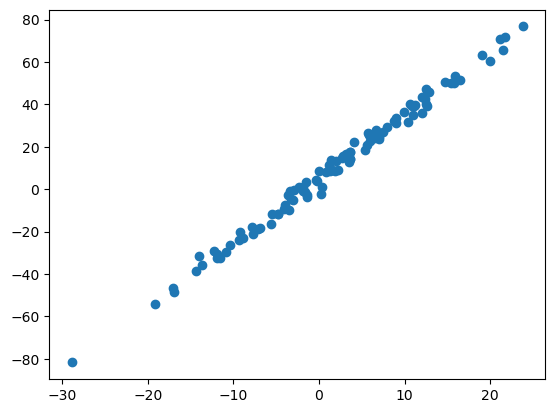

In [3818]:
plt.scatter(X,y)
plt.show()

In [3819]:
X.mean(),X.std()

(1.966000065760391, 10.055596770651098)

In [3820]:
X=(X-X.mean())/X.std()


In [3821]:
X.mean(),X.std()

(-3.3306690738754695e-17, 0.9999999999999998)

In [3822]:
def test_train(X,y,split=0.75):
    m=X.shape[0]
    data=np.zeros((m,2))
    data[:,0]=X
    data[:,1]=y
    np.random.shuffle(data)
    split =int(m*split)
    Xtr=data[:split,0]
    ytr=data[:split,1]
    Xte=data[split: ,0]
    yte=data[split: ,1]
    return Xtr,ytr,Xte,yte

In [3823]:
Xtr,ytr,Xte,yte=test_train(X,y)

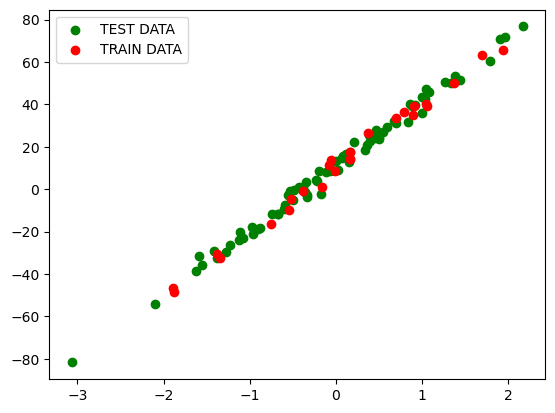

In [3824]:
plt.scatter(Xtr,ytr,color='green',label="TEST DATA")
plt.scatter(Xte,yte,color='red',label="TRAIN DATA")
plt.legend()
plt.show()

In [3867]:
#Model

def hypothesis(X,theta):
    return theta[0]+theta[1]*X

def error(X,y,theta):
    m=X.shape[0]
    e=0
    for i in range(m):
     y_i=hypothesis(X[i],theta)
     e=e+(y[i]-y_i)**2  
    return e/(2*m)

def  gradient(X,y,theta):
     m=X.shape[0]
     grad=np.zeros((2,))
     for i in range(m):
         exp=hypothesis(X[i],theta)-y[i]
         grad[0] =+(exp)
         grad[1] =+(exp)*X[i]
     return grad/m

def  train(X,y,lr=0.8,max=600):
     theta= np.zeros((2,))
     error_list=[]
     for i  in range (max):
         grad=gradient(X,y,theta)
         error_list.append(error(X,y,theta))
         theta[0]=theta[0]-lr*grad[0]
         theta[1]=theta[1]-lr*grad[1]
         
     plt.plot(error_list)
     return theta
                       




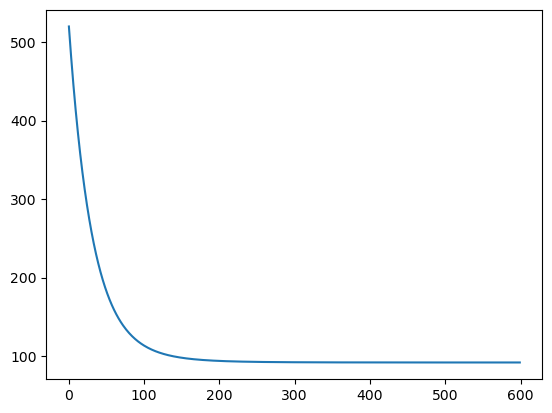

In [3869]:
theta=train(X,y)

In [3871]:
theta

array([19.20015196, 19.99170864])

In [3873]:
def predict(X,theta):
    return hypothesis(X,theta)

In [3875]:
yp=predict(Xte,theta)

In [3877]:
Xe=np.random.randn(10)

In [3879]:
yw=predict(Xe,theta)

In [3881]:
print(Xe,yw)

[ 0.06483712  2.11168855 -1.26707723  0.76965556  0.92829681  0.08531843
  0.17258754  0.33387748  0.05969412  1.44121672] [20.49635685 61.41641412 -6.13088686 34.58688165 37.75839133 20.90581318
 22.65047181 25.87493317 20.3935394  48.01253673]


In [3883]:
Xte.shape

(25,)

In [3885]:
yp.shape

(25,)

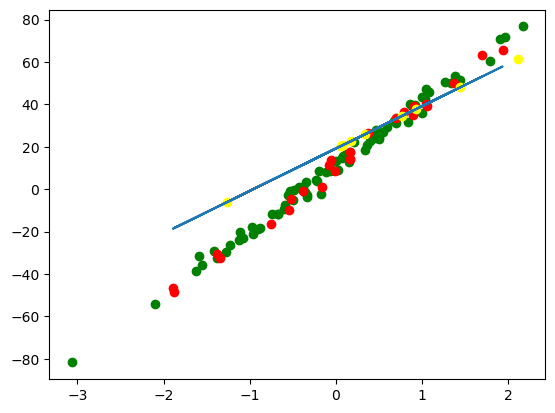

In [3887]:
plt.scatter(Xtr,ytr,color='green',label="TEST DATA")
plt.scatter(Xte,yte,color='red',label="TRAIN DATA")
plt.scatter(Xe,yw,color='yellow')
plt.plot(Xte,yp)

In [3889]:
def r2score(y,yp):
    ymean=y.mean()
    num=np.sum((y-yp)**2)
    denum=np.sum((y-ymean)**2)
    return  1 - num/denum

In [3891]:
r2score(yte,yp)

0.8060891509887034